In [1]:
import pickle
from scipy.cluster.hierarchy import fcluster
import pandas as pd

# Load the linkage and feature-matrix
Z = pickle.load(open('/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/new_clusters/ward_linkage.pkl','rb'))
df = pd.read_pickle('/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/new_clusters/df_matrix.pkl')

# Flatten into exactly 5 clusters
labels = fcluster(Z, t=3, criterion='maxclust')

# Group names by cluster
clusters = {i: [] for i in range(1, 6)}
for name, lbl in zip(df.columns, labels):
    clusters[lbl].append(name)

# Print up to 5 names per cluster
for i in range(1, 4):
    print(f"Cluster {i} ({len(clusters[i])} items):")
    for fn in clusters[i][:5]:      # show only first 5
        print("  ", fn)
    if len(clusters[i]) > 5:
        print("   …")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Cluster 1 (1844 items):
   20250115_153300.WAV
   20250201_154500.WAV
   20250124_030900.WAV
   20250113_030900.WAV
   20250111_212400.WAV
   …
Cluster 2 (2360 items):
   20250128_225100.WAV
   20250129_181500.WAV
   20250124_130900.WAV
   20250128_092100.WAV
   20250115_053300.WAV
   …
Cluster 3 (8641 items):
   20250131_091800.WAV
   20250131_130002.WAV
   20250126_000902.WAV
   20250203_060002.WAV
   20250124_095402.WAV
   …


In [2]:
df

20250131_091800.WAV  20250131_130002.WAV  20250126_000902.WAV  \
0               0.007918             0.024380             0.037925   
1               0.085079             0.008983             0.047645   
2               3.160957             3.233050             3.172300   
3               0.086996             0.142598             0.149909   
4               0.205161             0.258018             0.247301   
..                   ...                  ...                  ...   
131            -0.015050            -0.004078            -0.002322   
132            -0.029128             0.005910             0.000631   
133             0.019054            -0.008224            -0.007458   
134            -0.007624             0.001835             0.004504   
135            -0.007582            -0.010811             0.006303   

     20250203_060002.WAV  20250124_095402.WAV  20250120_130000.WAV  \
0               0.016045             0.010419             0.005001   
1               0.073223             0.092075             0.166531   
2               3.188466             3.116625             3.174028   
3               0.108791             0.129563             0.045789   
4               0.227300             0.245825             0.150808   
..                   ...                  ...                  ...   
131            -0.012893             0.008709             0.000471   
132             0.000816            -0.001551             0.027714   
133             0.004899             0.016521            -0.027927   
134             0.003919            -0.006345            -0.000836   
135            -0.014606            -0.009930            -0.004682   

     20250128_012700.WAV  20250115_153300.WAV  20250201_154500.WAV  \
0               0.015003             0.003542             0.006043   
1               0.164306             0.461688             0.432491   
2               3.259526             3.313803             3.312721   
3               0.116467             0.099694             0.109006   
4               0.237615             0.205937             0.211892   
..                   ...                  ...                  ...   
131             0.000497             0.000284             0.000577   
132            -0.011672            -0.009940             0.002931   
133            -0.000459             0.009253            -0.004109   
134             0.026979             0.004281             0.003223   
135            -0.001586            -0.001096            -0.000947   

     20250128_225100.WAV  ...  20250120_125400.WAV  20250119_145702.WAV  \
0               0.062096  ...             0.007085             0.016045   
1               0.080050  ...             0.113418             0.066517   
2               3.064912  ...             3.181701             3.245865   
3               0.311000  ...             0.062882             0.079089   
4               0.344037  ...             0.175389             0.193385   
..                   ...  ...                  ...                  ...   
131            -0.001496  ...            -0.001708            -0.008069   
132            -0.002165  ...            -0.013158             0.024266   
133            -0.015830  ...             0.017076            -0.013140   
134             0.000281  ...            -0.001685            -0.001464   
135            -0.022098  ...            -0.002899            -0.002666   

     20250128_103600.WAV  20250124_100602.WAV  20250201_045400.WAV  \
0               0.014586             0.021463             0.022505   
1               0.051253             0.109165             0.060008   
2               3.135788             3.227889             3.202593   
3               0.110793             0.141095             0.093307   
4               0.230098             0.256022             0.200163   
..                   ...                  ...                  ...   
131             0.002460             0.000916             0.019604   
132             0.001

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


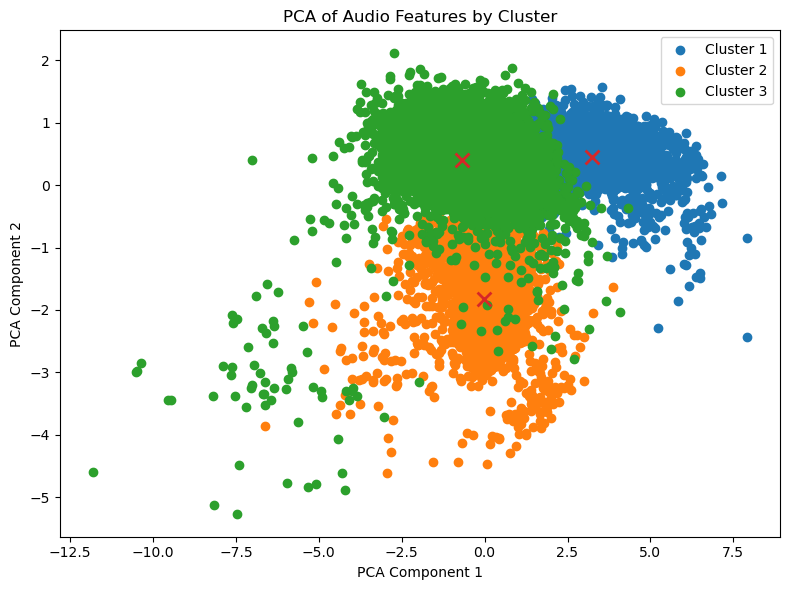

In [3]:
import pickle
import pandas as pd
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import ward
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 3. Prepare data for PCA: samples×features
X = df.T.values

# 4. Run PCA down to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 5. Plot each cluster in the PCA space
plt.figure(figsize=(8, 6))
for cluster_id in sorted(set(labels)):
    idx = (labels == cluster_id)
    plt.scatter(
        X_pca[idx, 0], 
        X_pca[idx, 1], 
        label=f'Cluster {cluster_id}'
    )

# 6. Overlay cluster centroids
centroids = []
for cluster_id in sorted(set(labels)):
    idx = (labels == cluster_id)
    centroids.append(X_pca[idx].mean(axis=0))
centroids = pd.DataFrame(centroids, index=[f'Cluster {i}' for i in sorted(set(labels))])
plt.scatter(centroids[0], centroids[1], marker='x', s=100, linewidths=2)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Audio Features by Cluster')
plt.legend()
plt.tight_layout()
plt.show()

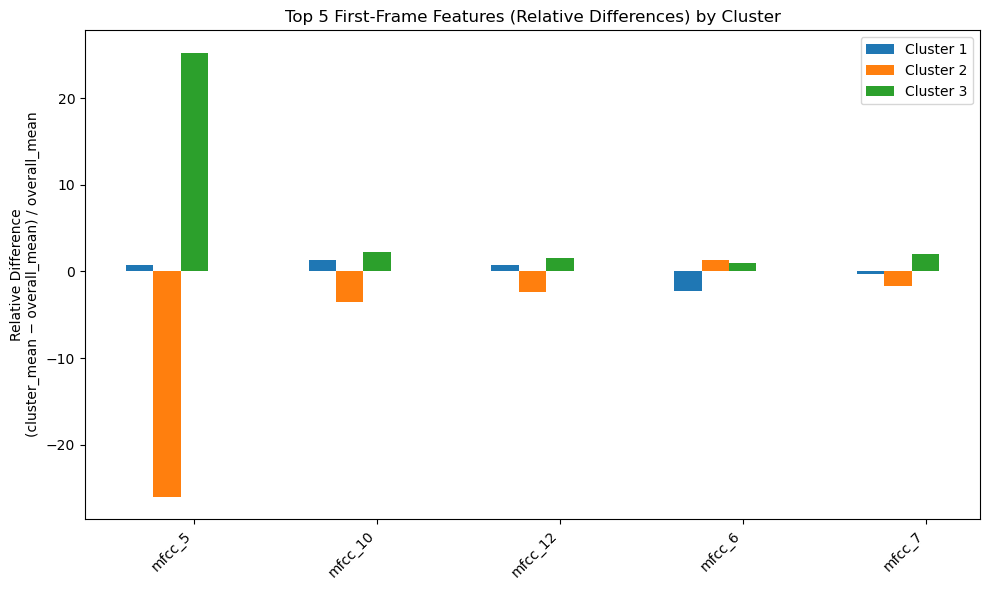

In [4]:
import numpy as np
# 3. Pull out first-frame (rows 0–67)
first_frame = df.iloc[:68, :]

# 4. Compute per-cluster means
cluster_means = pd.DataFrame({
    cl: first_frame.loc[:, np.array(first_frame.columns)[labels == cl]].mean(axis=1)
    for cl in sorted(set(labels))
})

# 5. Normalize to relative differences
overall_mean = cluster_means.mean(axis=1)
rel_diff = (cluster_means.sub(overall_mean, axis=0)
                        .div(overall_mean, axis=0))

# 6. Pick top 5 features by variance
top_idx = rel_diff.var(axis=1).nlargest(5).index

# 7. Map row‐index → feature name
feature_list = [
    'zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread',
    'spectral_entropy', 'spectral_flux', 'spectral_rolloff',
    'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
    'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
    'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6',
    'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12',
    'chroma_std', 'delta_zcr', 'delta_energy', 'delta_energy_entropy',
    'delta_spectral_centroid', 'delta_spectral_spread', 'delta_spectral_entropy',
    'delta_spectral_flux', 'delta_spectral_rolloff', 'delta_mfcc_1',
    'delta_mfcc_2', 'delta_mfcc_3', 'delta_mfcc_4', 'delta_mfcc_5',
    'delta_mfcc_6', 'delta_mfcc_7', 'delta_mfcc_8', 'delta_mfcc_9',
    'delta_mfcc_10', 'delta_mfcc_11', 'delta_mfcc_12', 'delta_mfcc_13',
    'delta_chroma_1', 'delta_chroma_2', 'delta_chroma_3', 'delta_chroma_4',
    'delta_chroma_5', 'delta_chroma_6', 'delta_chroma_7', 'delta_chroma_8',
    'delta_chroma_9', 'delta_chroma_10', 'delta_chroma_11',
    'delta_chroma_12', 'delta_chroma_std'
]

# 8. Plot
x = np.arange(len(top_idx))
width = 0.15
plt.figure(figsize=(10, 6))

for i, cl in enumerate(sorted(rel_diff.columns)):
    plt.bar(x + i*width,
            rel_diff.loc[top_idx, cl],
            width=width,
            label=f'Cluster {cl}')

# replace the numeric ticks with the real feature names
plt.xticks(x + width*2, [feature_list[i] for i in top_idx], rotation=45, ha='right')

plt.ylabel('Relative Difference\n(cluster_mean − overall_mean) / overall_mean')
plt.title('Top 5 First-Frame Features (Relative Differences) by Cluster')
plt.legend()
plt.tight_layout()
plt.show()

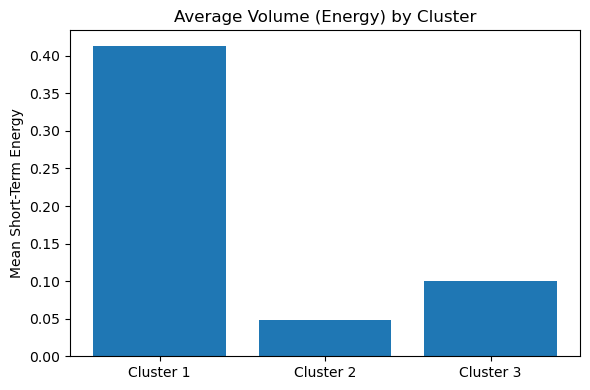

In [5]:
# 3) Extract the “energy” row from the first frame
#    In the 68‐feature ordering, energy is row index 1
energy = df.iloc[1, :]          # a 1×n_samples Series

# 4) Group by cluster, compute mean energy
cluster_ids = sorted(np.unique(labels))
means = [energy.values[labels == cl].mean() for cl in cluster_ids]

# 5) Plot
plt.figure(figsize=(6,4))
plt.bar([f'Cluster {cl}' for cl in cluster_ids], means)
plt.ylabel('Mean Short-Term Energy')
plt.title('Average Volume (Energy) by Cluster')
plt.tight_layout()
plt.show()

# Time Series Analysis

In [17]:
# go through each cluster folder, and convert file name into datetime
cluster_dir = '/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/new_clusters'
import os
import pandas as pd

# Initialize an empty list to store datetime, cluster, and filename information
datetime_cluster_filename_list = []

# Iterate through each cluster directory
for cluster in os.listdir(cluster_dir):
    # Construct the full path to the cluster directory
    cluster_path = os.path.join(cluster_dir, cluster)
    # Check if the cluster path is a directory
    if os.path.isdir(cluster_path):
        print(os.listdir(cluster_path))
        # Iterate through each file in the cluster directory
        for file in os.listdir(cluster_path):
            # Check if the file is a .wav file
            if file.endswith('.WAV'):
                # Extract the datetime from the file name
                date = file.split('_')[1]
                time = file.split('_')[2]
                # Convert the datetime string to a datetime object
                datetime = pd.to_datetime(date + ' ' + time)
                # Append the datetime, cluster, and filename information to the list
                datetime_cluster_filename_list.append((datetime, cluster, file))

# Convert the list into a DataFrame
df_datetime_cluster = pd.DataFrame(datetime_cluster_filename_list, columns=['datetime', 'cluster', 'file'])
        



['00555_20250116_023000.WAV', '01729_20250117_232400.WAV', '02012_20250114_231200.WAV', '01112_20250117_020300.WAV', '00907_20250113_224200.WAV', '01249_20250114_223300.WAV', '01173_20250115_013000.WAV', '01064_20250116_140300.WAV', '00342_20250130_040000.WAV', '00827_20250115_235100.WAV', '00034_20250129_044502.WAV', '01929_20250125_230302.WAV', '01786_20250125_010900.WAV', '00262_20250129_005400.WAV', '00498_20250129_230000.WAV', '02188_20250129_221502.WAV', '01180_20250131_023000.WAV', '01775_20250122_230602.WAV', '00957_20250205_004500.WAV', '02243_20250202_230000.WAV', '01614_20250115_200000.WAV', '00632_20250129_232103.WAV', '00691_20250204_013002.WAV', '02133_20250115_043900.WAV', '01417_20250126_010600.WAV', '01844_20250124_113900.WAV', '00113_20250201_232402.WAV', '00883_20250116_121500.WAV', '02212_20250205_014800.WAV', '00420_20250113_223900.WAV', '00141_20250116_121200.WAV', '01961_20250128_232700.WAV', '00747_20250113_041800.WAV', '01324_20250201_223003.WAV', '00688_202501

/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_56490/4031085576.py:24: FutureWarning: Parsed string "20250116 023000.WAV" included an un-recognized timezone "WAV". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  datetime = pd.to_datetime(date + ' ' + time)
/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_56490/4031085576.py:24: FutureWarning: Parsed string "20250117 232400.WAV" included an un-recognized timezone "WAV". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  datetime = pd.to_datetime(date + ' ' + time)
/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_56490/4031085576.py:24: FutureWarning: Parsed string "20250114 231200.WAV" included an un-recognized timezone "WAV". 

['05589_20250118_083600.WAV', '05368_20250127_111200.WAV', '03271_20250128_131802.WAV', '02671_20250124_200602.WAV', '08044_20250115_193300.WAV', '02682_20250118_182100.WAV', '01875_20250131_235703.WAV', '02706_20250127_213300.WAV', '06255_20250130_000302.WAV', '02553_20250120_063002.WAV', '00673_20250125_130600.WAV', '00835_20250131_075400.WAV', '04784_20250114_174800.WAV', '04777_20250114_132100.WAV', '06580_20250130_120300.WAV', '07807_20250130_075703.WAV', '06458_20250129_151203.WAV', '03306_20250202_012700.WAV', '00143_20250204_070302.WAV', '01072_20250122_100000.WAV', '01662_20250119_093600.WAV', '01715_20250202_180000.WAV', '06931_20250131_190900.WAV', '01434_20250115_155400.WAV', '00229_20250204_072703.WAV', '02107_20250202_182400.WAV', '03746_20250117_121800.WAV', '01269_20250115_121800.WAV', '03886_20250204_213900.WAV', '05856_20250109_231800.WAV', '04816_20250201_092100.WAV', '04933_20250124_203300.WAV', '01081_20250120_030002.WAV', '00699_20250128_082700.WAV', '03875_202501

/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_56490/4031085576.py:24: FutureWarning: Parsed string "20250204 061502.WAV" included an un-recognized timezone "WAV". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  datetime = pd.to_datetime(date + ' ' + time)
/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_56490/4031085576.py:24: FutureWarning: Parsed string "20250202 210600.WAV" included an un-recognized timezone "WAV". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  datetime = pd.to_datetime(date + ' ' + time)
/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_56490/4031085576.py:24: FutureWarning: Parsed string "20250131 181203.WAV" included an un-recognized timezone "WAV". 

['00741_20250122_150902.WAV', '00467_20250120_073600.WAV', '00158_20250110_060900.WAV', '00422_20250110_231500.WAV', '00141_20250204_064200.WAV', '00934_20250131_031202.WAV', '00708_20250114_150600.WAV', '01598_20250109_210300.WAV', '00631_20250122_155102.WAV', '01723_20250110_233900.WAV', '00034_20250121_043900.WAV', '01406_20250120_163900.WAV', '00312_20250121_150600.WAV', '01176_20250112_153900.WAV', '00540_20250115_153000.WAV', '01812_20250110_135700.WAV', '01204_20250112_140000.WAV', '00695_20250118_133900.WAV', '01057_20250118_093600.WAV', '00509_20250112_063600.WAV', '01121_20250111_205100.WAV', '00873_20250119_064201.WAV', '01601_20250113_092400.WAV', '00343_20250110_122100.WAV', '00880_20250112_053300.WAV', '00113_20250118_064800.WAV', '00065_20250112_213300.WAV', '00758_20250111_091500.WAV', '00997_20250127_151800.WAV', '00097_20250110_184500.WAV', '00264_20250112_182100.WAV', '01456_20250112_060000.WAV', '00823_20250112_194500.WAV', '00559_20250113_160600.WAV', '01572_202501

/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_56490/4031085576.py:24: FutureWarning: Parsed string "20250110 105100.WAV" included an un-recognized timezone "WAV". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  datetime = pd.to_datetime(date + ' ' + time)
/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_56490/4031085576.py:24: FutureWarning: Parsed string "20250202 163600.WAV" included an un-recognized timezone "WAV". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  datetime = pd.to_datetime(date + ' ' + time)
/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_56490/4031085576.py:24: FutureWarning: Parsed string "20250110 061800.WAV" included an un-recognized timezone "WAV". 

In [18]:
df_datetime_cluster

datetime     cluster                       file
0     2025-01-16 02:30:00  cluster_02  00555_20250116_023000.WAV
1     2025-01-17 23:24:00  cluster_02  01729_20250117_232400.WAV
2     2025-01-14 23:12:00  cluster_02  02012_20250114_231200.WAV
3     2025-01-17 02:03:00  cluster_02  01112_20250117_020300.WAV
4     2025-01-13 22:42:00  cluster_02  00907_20250113_224200.WAV
...                   ...         ...                        ...
12840 2025-01-15 03:15:00  cluster_01  01358_20250115_031500.WAV
12841 2025-01-10 20:45:00  cluster_01  01095_20250110_204500.WAV
12842 2025-01-29 15:27:00  cluster_01  00782_20250129_152700.WAV
12843 2025-01-12 08:39:00  cluster_01  00843_20250112_083900.WAV
12844 2025-01-13 16:39:00  cluster_01  00600_20250113_163900.WAV

[12845 rows x 3 columns]

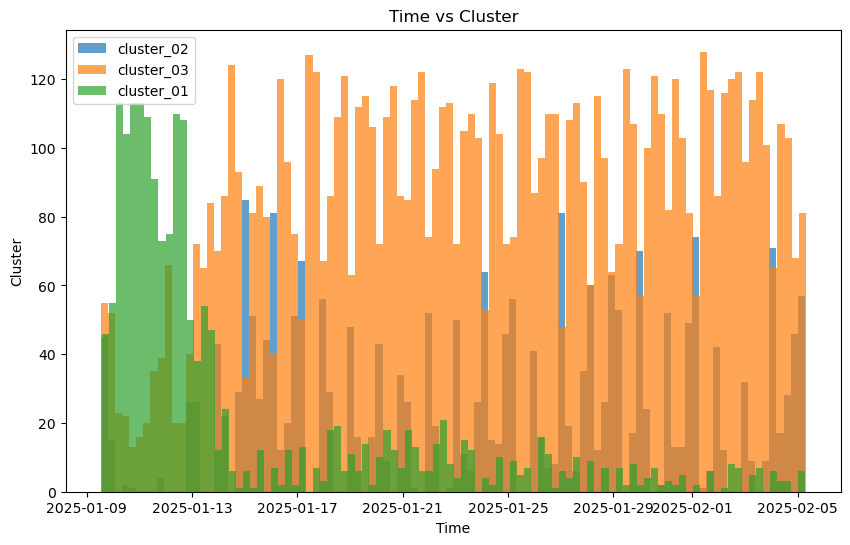

In [19]:
# make a histogram against time for each cluster
plt.figure(figsize=(10, 6))
for cluster in df_datetime_cluster['cluster'].unique():
    plt.hist(df_datetime_cluster[df_datetime_cluster['cluster'] == cluster]['datetime'], bins=100, alpha=0.7, label=cluster)
plt.xlabel('Time')
plt.ylabel('Cluster')
plt.title('Time vs Cluster')
plt.legend()
plt.show()

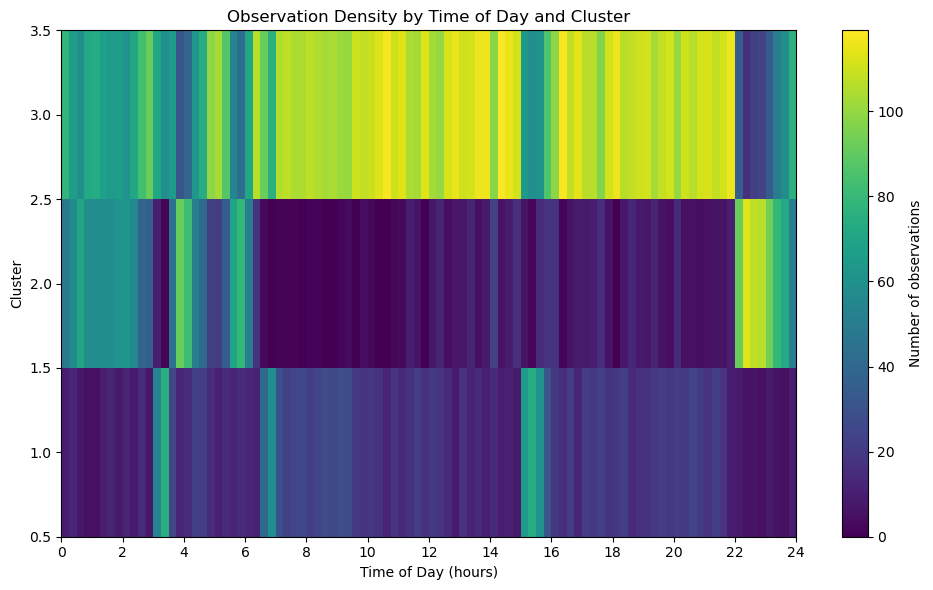

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣  Flatten the time-of-day to a single float in hours
time_of_day = (
    df_datetime_cluster['datetime'].dt.hour
    + df_datetime_cluster['datetime'].dt.minute / 60
    + df_datetime_cluster['datetime'].dt.second / 3600
)
clusters = df_datetime_cluster['cluster'].apply(lambda x: x.split('_')[1]).astype(float)  # Convert cluster to float to avoid TypeError

# 2️⃣  Build bin edges
#    • X: 96 bins = 15-minute resolution across 24 h
#    • Y: one bin per integer cluster label
x_bins = np.linspace(0, 24, 97)                                  # 0-24 h, inclusive
y_bins = np.arange(clusters.min() - 0.5, clusters.max() + 1.5)    # center on integers

# 3️⃣  Plot the 2-D histogram
fig, ax = plt.subplots(figsize=(10, 6))
counts, _, _, im = ax.hist2d(
    time_of_day,
    clusters,
    bins=[x_bins, y_bins],
    cmap='viridis',         # optional; remove if you truly want the default palette
)

# 4️⃣  Tidy up
ax.set_xlabel('Time of Day (hours)')
ax.set_ylabel('Cluster')
ax.set_title('Observation Density by Time of Day and Cluster')
ax.set_xlim(0, 24)
ax.set_xticks(np.arange(0, 25, 2))        # every 2 h for readability
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Number of observations')

plt.tight_layout()
plt.show()


# Temperature analysis

In [10]:
from pathlib import Path
import re
import struct
from mutagen.wave import WAVE          # handles standard LIST/INFO
import pandas as pd
import struct

AUDIO_DIR = Path("/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/new_clusters")

# Regex for “… temperature was 1.7C”   (handles 1.7 C, -3C, 12.0 C, etc.)
PATTERN = re.compile(r"temperature\s+was\s+([-+]?\d+(?:\.\d+)?)\s*C", re.I)

# ──────────────────────────────────────────────────────────────────────────────
# Helper #1 : safest possible extractor for the comment string
# ──────────────────────────────────────────────────────────────────────────────
def extract_comment(path: Path) -> str | None:
    """
    Safely return the AudioMoth status line, trying three avenues:
      1) mutagen’s ICMT tag
      2) raw LIST/INFO ➜ ICMT chunk
      3) Broadcast-WAV ‘bext’ Description
    """
    # ---- 1.  mutagen (works after upgrading) -------------------------------
    try:
        wav = WAVE(path)
        icmt = wav.get("ICMT")
        if icmt:
            return icmt[0]
    except Exception:
        pass

    # Read entire file into memory once; cheap for <1-min WAVs
    data = path.read_bytes()

    # ---- 2.  manual LIST/INFO ➜ ICMT --------------------------------------
    icmt_pos = data.find(b"ICMT")
    if icmt_pos != -1:
        size = struct.unpack_from("<I", data, icmt_pos + 4)[0]
        raw  = data[icmt_pos + 8 : icmt_pos + 8 + size]
        return raw.split(b"\x00", 1)[0].decode("ascii", "replace")

    # ---- 3.  Broadcast-WAV ‘bext’ Description -----------------------------
    bext_pos = data.find(b"bext")
    if bext_pos != -1:
        desc = data[bext_pos + 8 : bext_pos + 8 + 256]
        return desc.split(b"\x00", 1)[0].decode("ascii", "replace")

    # Nothing found
    return None

# ──────────────────────────────────────────────────────────────────────────────
def extract_temperature(comment: str | None) -> float | None:
    if comment:
        m = PATTERN.search(comment)
        if m:
            return float(m.group(1))
    return None

# ──────────────────────────────────────────────────────────────────────────────
# Walk the cluster folders and build your DataFrame
records = []
for cluster_dir in sorted(AUDIO_DIR.iterdir()):
    if cluster_dir.is_dir():
        # accept .wav and .WAV just in case
        for wav_path in cluster_dir.glob("*.WAV"):
            comment = extract_comment(wav_path)
            temp_c  = extract_temperature(comment)
            records.append(
                {
                    "cluster": cluster_dir.name,
                    "file": wav_path.name,
                    "temperature_C": temp_c,
                    "comment": comment,
                }
            )

df = pd.DataFrame(records)
print(df.head())


      cluster                       file  temperature_C  \
0  cluster_01  00741_20250122_150902.WAV            5.5   
1  cluster_01  00467_20250120_073600.WAV            1.7   
2  cluster_01  00158_20250110_060900.WAV           -5.8   
3  cluster_01  00422_20250110_231500.WAV           -6.4   
4  cluster_01  00141_20250204_064200.WAV            6.3   

                                             comment  
0  Recorded at 15:09:02 22/01/2025 (UTC) by Audio...  
1  Recorded at 07:36:00 20/01/2025 (UTC) by Audio...  
2  Recorded at 06:09:00 10/01/2025 (UTC) by Audio...  
3  Recorded at 23:15:00 10/01/2025 (UTC) by Audio...  
4  Recorded at 06:42:00 04/02/2025 (UTC) by Audio...  


<Axes: title={'center': 'temperature_C'}, xlabel='cluster'>

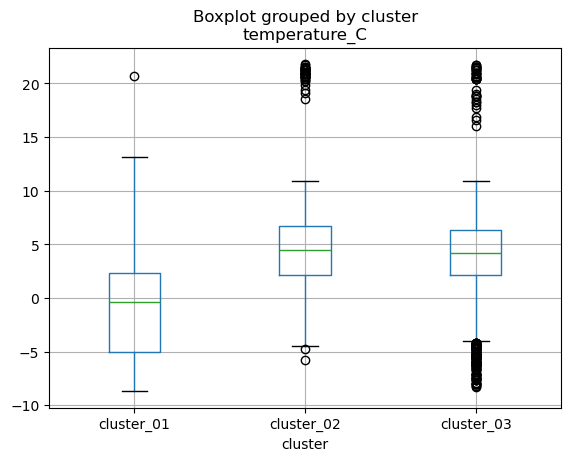

In [18]:
df.boxplot(column='temperature_C', by='cluster')

In [19]:
for cluster, group in df.groupby('cluster'):
    print(f"Cluster: {cluster}")
    print(group['temperature_C'].describe())
    print()



Cluster: cluster_01
count    1844.000000
mean       -0.752169
std         4.508791
min        -8.700000
25%        -5.000000
50%        -0.400000
75%         2.300000
max        20.700000
Name: temperature_C, dtype: float64

Cluster: cluster_02
count    2360.000000
mean        4.583051
std         3.836515
min        -5.800000
25%         2.100000
50%         4.500000
75%         6.700000
max        21.800000
Name: temperature_C, dtype: float64

Cluster: cluster_03
count    8641.000000
mean        4.069494
std         3.379384
min        -8.300000
25%         2.100000
50%         4.200000
75%         6.300000
max        21.700000
Name: temperature_C, dtype: float64



# Temperature Over Time

In [21]:
# Merge the datetime cluster DataFrame with the temperature DataFrame
merged_df = pd.merge(df_datetime_cluster, df, on=['cluster', 'file'], how='inner')
print(merged_df.head())


             datetime     cluster                       file  temperature_C  \
0 2025-01-16 02:30:00  cluster_02  00555_20250116_023000.WAV            6.1   
1 2025-01-17 23:24:00  cluster_02  01729_20250117_232400.WAV            4.2   
2 2025-01-14 23:12:00  cluster_02  02012_20250114_231200.WAV            8.5   
3 2025-01-17 02:03:00  cluster_02  01112_20250117_020300.WAV            5.6   
4 2025-01-13 22:42:00  cluster_02  00907_20250113_224200.WAV            1.2   

                                             comment  
0  Recorded at 02:30:00 16/01/2025 (UTC) by Audio...  
1  Recorded at 23:24:00 17/01/2025 (UTC) by Audio...  
2  Recorded at 23:12:00 14/01/2025 (UTC) by Audio...  
3  Recorded at 02:03:00 17/01/2025 (UTC) by Audio...  
4  Recorded at 22:42:00 13/01/2025 (UTC) by Audio...  


/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_56490/3348782376.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


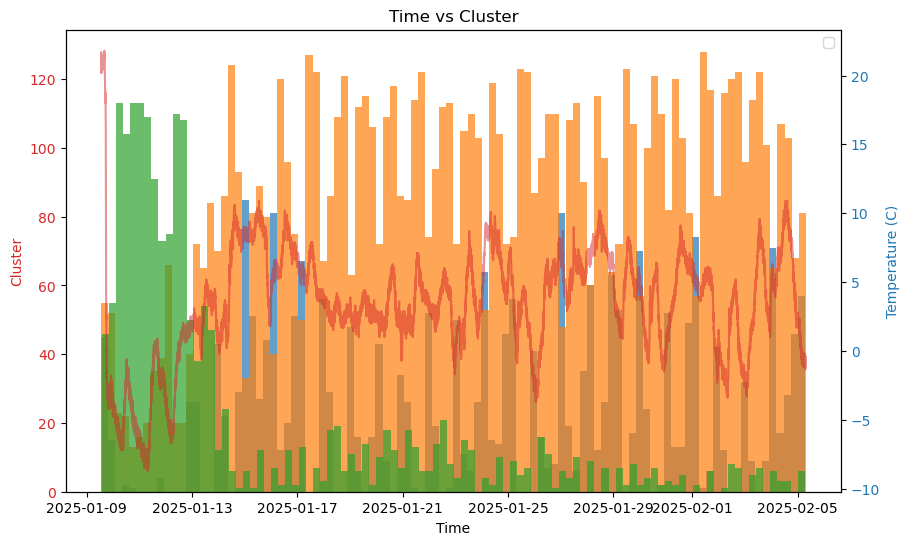

In [25]:
# make a histogram against time for each cluster and plot temperature over time on a second axis
fig, ax1 = plt.subplots(figsize=(10, 6))

for cluster in merged_df['cluster'].unique():
    ax1.hist(merged_df[merged_df['cluster'] == cluster]['datetime'], bins=100, alpha=0.7, label=cluster)

ax1.set_xlabel('Time')
ax1.set_ylabel('Cluster', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_title('Time vs Cluster')

ax2 = ax1.twinx()

merged_df_sorted = merged_df.sort_values(by='datetime')
ax2.plot(merged_df_sorted['datetime'], merged_df_sorted['temperature_C'], color='tab:red', alpha=0.5)

ax2.set_ylabel('Temperature (C)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.legend()
plt.show()

# Cluster Episodes

In [31]:
import pandas as pd

# 0️⃣  Make sure the frame is in chronological order
merged_df = merged_df.sort_values('datetime').reset_index(drop=True)

# 1️⃣  Tag every contiguous run of equal `cluster` with a unique id
merged_df['episode_id'] = (
    merged_df['cluster'].ne(merged_df['cluster'].shift())  # True where label changes
    .cumsum()                                              # running total → episode_id
)

# 2️⃣  Identify the first & last rows of each episode
first_rows = merged_df.groupby('episode_id').head(1)   # start of each run
last_rows  = merged_df.groupby('episode_id').tail(1)   # end   of each run

# 3️⃣  Temperature **before** each run: look one row back from every first_row
first_rows = first_rows.copy()
first_rows['temp_before'] = merged_df['temperature_C'].shift(1).loc[first_rows.index]

# 4️⃣  Temperature **at the end** of each run
last_rows = last_rows.copy()
last_rows['temp_end'] = last_rows['temperature_C']

# 5️⃣  Keep only the columns we need and drop episodes that have no 'before' row
episodes = (
    first_rows[['episode_id', 'cluster', 'temp_before']]
    .join(last_rows.set_index('episode_id')['temp_end'])
    .dropna(subset=['temp_before'])          # first episode in the file has no history
)

# ── optional: summarise per cluster ────────────────────────────────
avg_before = episodes.groupby('cluster')['temp_before'].mean()
avg_end    = episodes.groupby('cluster')['temp_end'].mean()

print("Average temp just *before* each cluster episode starts:")
print(avg_before, end="\n\n")

print("Average temp at the *end* of each cluster episode:")
print(avg_end)


Average temp just *before* each cluster episode starts:
cluster
cluster_01    1.421677
cluster_02    5.415035
cluster_03    2.945288
Name: temp_before, dtype: float64

Average temp at the *end* of each cluster episode:
cluster
cluster_01    2.672436
cluster_02    6.085714
cluster_03    3.037647
Name: temp_end, dtype: float64


In [33]:
avg_len_by_cluster = (merged_df
                      .groupby(['cluster', 'episode_id'])  # size of every episode per cluster …
                      .size()
                      .groupby('cluster')                  # … then average those sizes
                      .mean())

print('\nAverage episode length per cluster:')
print(avg_len_by_cluster)




Average episode length per cluster:
cluster
cluster_01     3.770961
cluster_02     8.222997
cluster_03    11.310209
dtype: float64


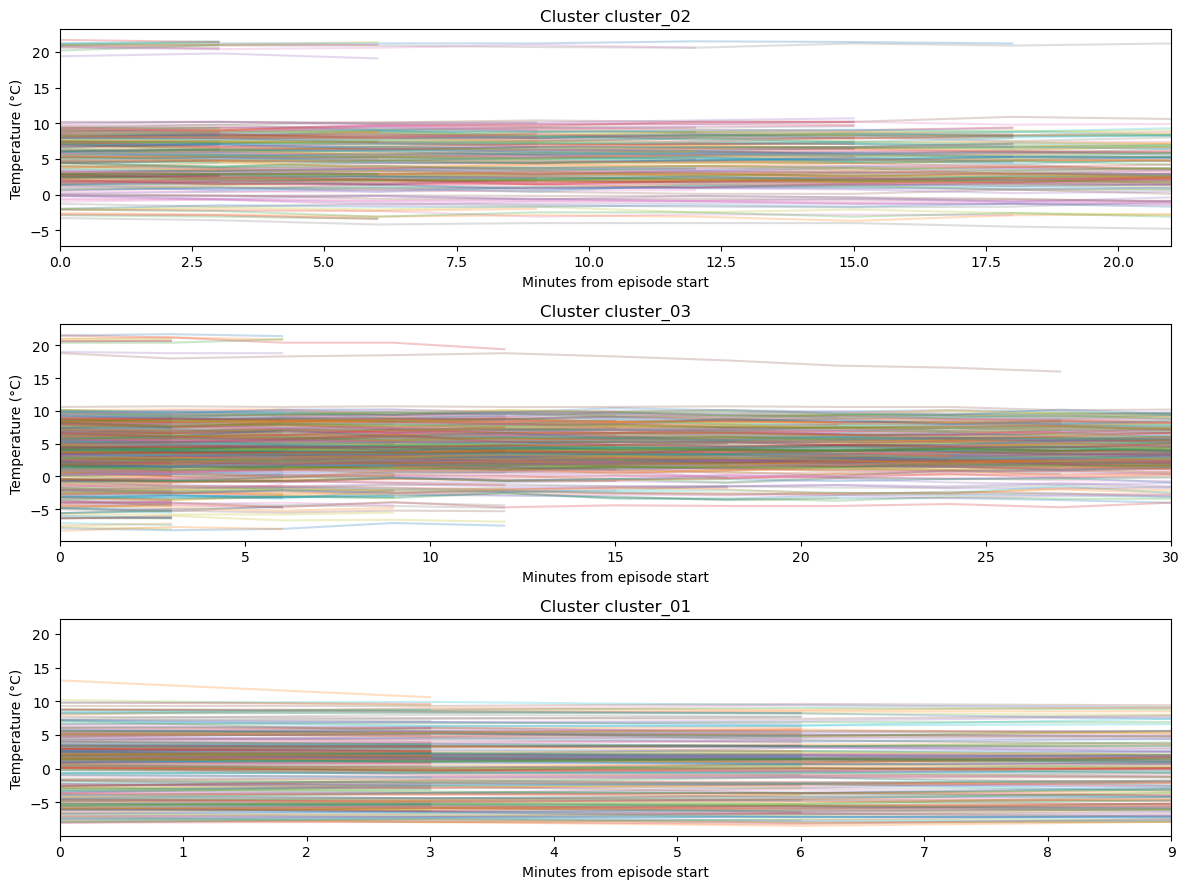

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# ── 0.  Ensure chronological order & episode_id ───────────────────────
merged_df = merged_df.sort_values('datetime').reset_index(drop=True)
merged_df['episode_id'] = (merged_df['cluster']
                           .ne(merged_df['cluster'].shift())
                           .cumsum())

# ── 1.  Plot one subplot per cluster ──────────────────────────────────
clusters   = merged_df['cluster'].unique()
n_clusters = len(clusters)

fig, axes = plt.subplots(n_clusters, 1,
                         figsize=(12, 3 * n_clusters),
                         sharex=False)

if n_clusters == 1:                       # make axes iterable when n_clusters == 1
    axes = [axes]

for ax, cluster in zip(axes, clusters):
    avg_len = int(round(avg_len_by_cluster.loc[cluster]))  # average rows for this cluster
    df_c    = merged_df[merged_df['cluster'] == cluster]

    for _, ep in df_c.groupby('episode_id'):
        # Take only the first <avg_len> rows of the episode
        y = ep['temperature_C'].iloc[:avg_len].to_numpy()
        x = np.arange(len(y)) * 3                          # 3-min steps → minutes

        # OPTIONAL: pad shorter episodes to keep x-axis length identical
        # if len(y) < avg_len:
        #     y = np.append(y, [np.nan] * (avg_len - len(y)))  # leaves gaps instead of hard cut

        ax.plot(x, y, alpha=0.25)                          # low alpha = “heat-map-ish” effect

    ax.set_title(f'Cluster {cluster}')
    ax.set_xlim(0, (avg_len - 1) * 3)
    ax.set_xlabel('Minutes from episode start')
    ax.set_ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()


# Takeaways

From this analysis, it seems that Cluster 1 represents "Full ON" mode. It turns on whenever the temperature is lowest, for short periods of time, and produces the loudest sound.

Cluster 2 might be 'Standby' mode, which seems to turn on at 10pm every day. It is the quietest. 

Clusters 3, 4, and 5 seem to be somewhere in between—they're on for most of the day, and might be trying to maintain temperature at a constant level, rather than bring it back to normal (what cluster 1 seems to do)

# FFT vs Clusters

Decided to go for continuous frequency plotting (rather than the box plots), since there did not appear to be discrete frequency bins.

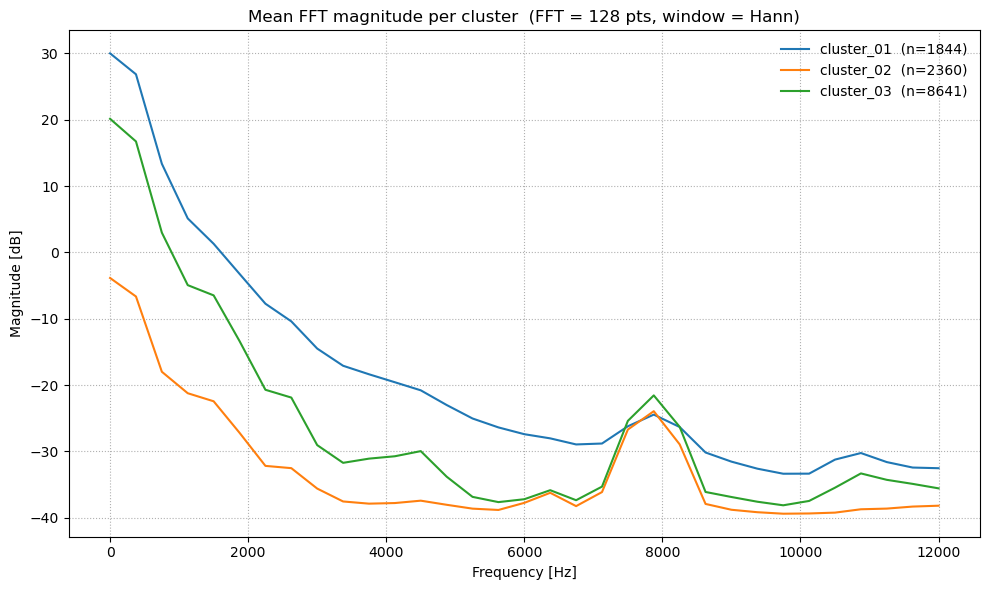

In [39]:
from pathlib import Path
from collections import defaultdict
import numpy as np
import scipy.signal as sps
import soundfile as sf
import matplotlib.pyplot as plt
from tqdm import tqdm

# ── configuration ───────────────────────────────────────────────────────────
AUDIO_ROOT = Path("/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/new_clusters")
TARGET_FS  = 48_000                # AudioMoth default
FFT_LEN    = 128             # 2.73 s @ 48 kHz; any power-of-two is fine
FMAX_PLOT  = 12_000                # crop upper x-axis
WINDOW     = sps.windows.hann      # choose your favourite taper
CMAP       = plt.get_cmap("tab10")

# ── helper: read file, resample if needed, make mono ────────────────────────
def load_mono(path, target_fs):
    x, fs = sf.read(path, always_2d=False)
    if x.ndim == 2:                   # stereo → mono
        x = x.mean(axis=1)
    if fs != target_fs:               # keep common grid
        x = sps.resample_poly(x, target_fs, fs)
    return x.astype(np.float32, copy=False)

# ── main loop: build per-cluster list of FFT magnitudes ─────────────────────
cluster_mag = defaultdict(list)
cluster_cnt = defaultdict(int)

for cluster_dir in sorted(AUDIO_ROOT.iterdir()):
    if not cluster_dir.is_dir():
        continue
    for wav in tqdm(cluster_dir.glob("*.WAV"), desc=cluster_dir.name, leave=False):
        x = load_mono(wav, TARGET_FS)

        # ——— keep exactly FFT_LEN samples (pad or truncate) ———
        if len(x) < FFT_LEN:
            x = np.pad(x, (0, FFT_LEN - len(x)))
        else:
            x = x[:FFT_LEN]

        # ——— FFT ———
        w    = WINDOW(FFT_LEN, sym=False)
        Xmag = np.abs(np.fft.rfft(x * w))        # half-spectrum, linear magnitude

        cluster_mag[cluster_dir.name].append(Xmag)
        cluster_cnt[cluster_dir.name] += 1

# ── average magnitudes per cluster ─────────────────────────────────────────
freqs = np.fft.rfftfreq(FFT_LEN, 1 / TARGET_FS)
mean_mag = {c: np.mean(np.vstack(mags), axis=0) for c, mags in cluster_mag.items()}

# ── plot ───────────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 6))
for i, (c, mag) in enumerate(sorted(mean_mag.items())):
    sel = freqs <= FMAX_PLOT
    plt.plot(freqs[sel],
             20 * np.log10(mag[sel] + 1e-12),          # dB magnitude
             label=f"{c}  (n={cluster_cnt[c]})",
             color=CMAP(i % CMAP.N))

plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.title(f"Mean FFT magnitude per cluster  (FFT = {FFT_LEN} pts, window = Hann)")
plt.legend(frameon=False)
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()


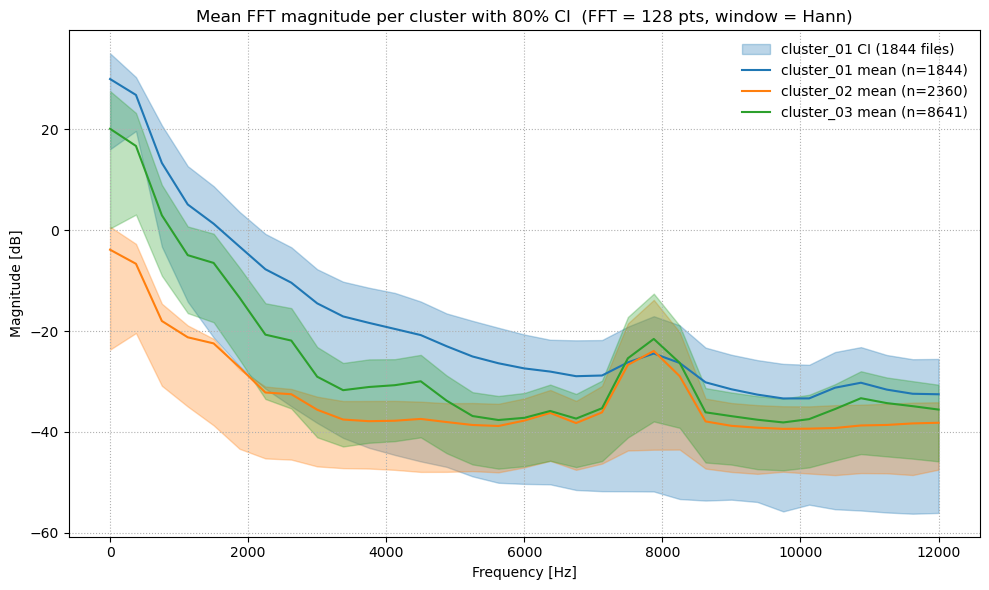

In [42]:
from pathlib import Path
from collections import defaultdict
import numpy as np
import scipy.signal as sps
import soundfile as sf
import matplotlib.pyplot as plt
from tqdm import tqdm

# ── configuration ───────────────────────────────────────────────────────────
AUDIO_ROOT = Path("/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/new_clusters")
TARGET_FS  = 48_000                # AudioMoth default
FFT_LEN    = 128             # 2.73 s @ 48 kHz; any power-of-two is fine
FMAX_PLOT  = 12_000                # crop upper x-axis
WINDOW     = sps.windows.hann      # choose your favourite taper
CMAP       = plt.get_cmap("tab10")
CI_PERCENTILE = 80  # 95% confidence interval (2.5th–97.5th percentiles)

# ── helper: read file, resample if needed, make mono ────────────────────────
def load_mono(path, target_fs):
    x, fs = sf.read(path, always_2d=False)
    if x.ndim == 2:                   # stereo → mono
        x = x.mean(axis=1)
    if fs != target_fs:               # keep common grid
        x = sps.resample_poly(x, target_fs, fs)
    return x.astype(np.float32, copy=False)

# ── main loop: build per-cluster list of FFT magnitudes ─────────────────────
cluster_mag = defaultdict(list)
cluster_cnt = defaultdict(int)

for cluster_dir in sorted(AUDIO_ROOT.iterdir()):
    if not cluster_dir.is_dir():
        continue
    for wav in tqdm(cluster_dir.glob("*.WAV"), desc=cluster_dir.name, leave=False):
        x = load_mono(wav, TARGET_FS)

        # ——— keep exactly FFT_LEN samples (pad or truncate) ———
        if len(x) < FFT_LEN:
            x = np.pad(x, (0, FFT_LEN - len(x)))
        else:
            x = x[:FFT_LEN]

        # ——— FFT ———
        w    = WINDOW(FFT_LEN, sym=False)
        Xmag = np.abs(np.fft.rfft(x * w))        # half-spectrum, linear magnitude

        cluster_mag[cluster_dir.name].append(Xmag)
        cluster_cnt[cluster_dir.name] += 1

# ── prepare arrays for mean & confidence intervals ─────────────────────────
freqs = np.fft.rfftfreq(FFT_LEN, 1 / TARGET_FS)

mean_mag = {}
lower_ci = {}
upper_ci = {}

for c, mags in cluster_mag.items():
    # Stack into shape (n_files, n_freq_bins)
    arr = np.vstack(mags)

    # Compute mean across files (axis=0)
    mean_mag[c] = np.mean(arr, axis=0)

    # Compute lower & upper percentiles (for a two‐sided CI)
    lower_ci[c] = np.percentile(arr, (100 - CI_PERCENTILE) / 2, axis=0)
    upper_ci[c] = np.percentile(arr, 100 - (100 - CI_PERCENTILE) / 2, axis=0)

# ── plot mean + CI shading per cluster ─────────────────────────────────────
plt.figure(figsize=(10, 6))

for i, c in enumerate(sorted(mean_mag.keys())):
    sel = freqs <= FMAX_PLOT

    # Convert linear magnitude → dB (add small epsilon to avoid log of zero)
    mag_db       = 20 * np.log10(mean_mag[c][sel] + 1e-12)
    lower_db     = 20 * np.log10(lower_ci[c][sel] + 1e-12)
    upper_db     = 20 * np.log10(upper_ci[c][sel] + 1e-12)

    color = CMAP(i % CMAP.N)
    # Plot shaded CI region
    plt.fill_between(
        freqs[sel],
        lower_db,
        upper_db,
        color=color,
        alpha=0.3,
        label=f"{c} CI ({cluster_cnt[c]} files)" if i == 0 else None  # only label once for legend clarity
    )
    # Plot mean line
    plt.plot(
        freqs[sel],
        mag_db,
        color=color,
        label=f"{c} mean (n={cluster_cnt[c]})"
    )

# Adjust legend to show cluster names & mean lines; CI shading is implicitly tied
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.title(f"Mean FFT magnitude per cluster with {CI_PERCENTILE}% CI  (FFT = {FFT_LEN} pts, window = Hann)")
plt.legend(frameon=False)
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()


-----------

# FFT Clustering

reading: 100%|██████████| 12845/12845 [00:18<00:00, 701.38file/s]


✓ Wrote cluster_assignments.csv


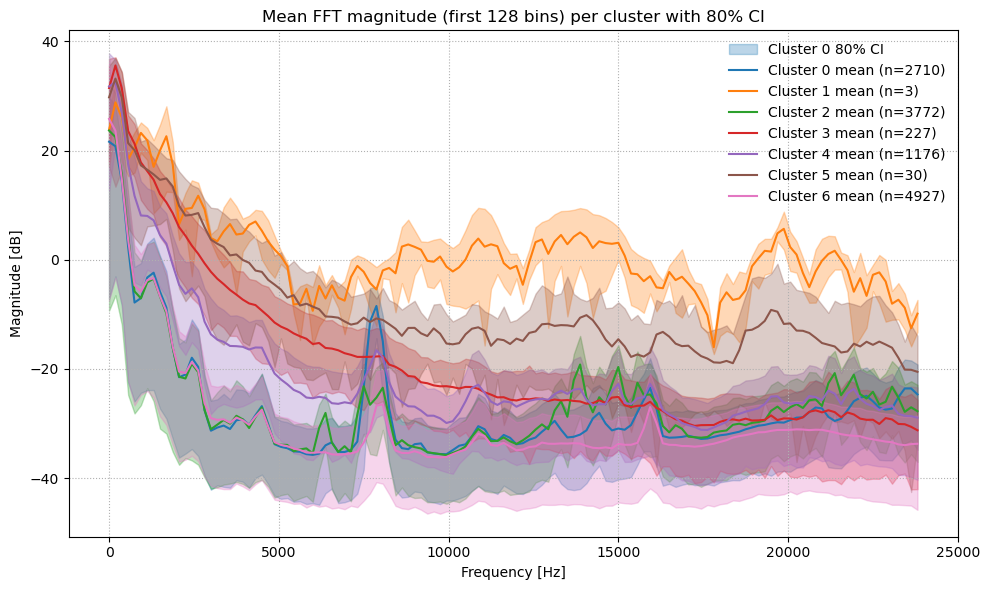

In [47]:
#!/usr/bin/env python3
"""cluster_fft.py – Cluster raw WAV files by their 128‑bin FFT magnitude spectra.

1.  **Scan folder** `AUDIO_ROOT` for *.WAV*.
2.  **Pre‑process** each file → mono, resample to 48 kHz, trim/pad to 256 samples.
3.  **Feature** = |FFT| (real half‑spectrum) → first 128 bins (DC … bin 127).
4.  **Standardise** features (z‑score).
5.  **K‑means** on the 128‑D space (`N_CLUSTERS`).
6.  **Plot** mean ± CI per discovered cluster.
7.  **Write** `cluster_assignments.csv` listing file → cluster.

Run:
    python cluster_fft.py
Dependencies:
    pip install numpy scipy scikit-learn soundfile tqdm matplotlib
"""
from __future__ import annotations

from pathlib import Path
from collections import defaultdict
import csv
import numpy as np
import scipy.signal as sps
import soundfile as sf
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ───────── configuration ────────────────────────────────────────────────
AUDIO_ROOT   = Path("/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/Heat_pump")
TARGET_FS    = 48_000       # AudioMoth default sample rate
FFT_LEN      = 256          # 256‑pt FFT ⇒ 129 rFFT bins
N_BINS       = 128          # use first 128 bins (0 Hz … bin 127)
N_CLUSTERS   = 7            # tweak as needed
WINDOW       = sps.windows.hann
CI_PERCENTILE = 80          # e.g. 80 % CI (10th–90th percentiles)
CMAP         = plt.get_cmap("tab10")

# ───────── helper: read, resample, mono ────────────────────────────────
def load_mono(path: Path, target_fs: int) -> np.ndarray:
    """Read a WAV, convert to mono, resample to *target_fs* if needed."""
    x, fs = sf.read(path, always_2d=False)
    if x.ndim == 2:
        x = x.mean(axis=1)
    if fs != target_fs:
        x = sps.resample_poly(x, target_fs, fs)
    return x.astype(np.float32, copy=False)

# ───────── feature extraction ──────────────────────────────────────────
features: list[np.ndarray] = []
file_paths: list[Path]    = []

for wav in tqdm(sorted(AUDIO_ROOT.glob("*.WAV")), desc="reading", unit="file"):
    x = load_mono(wav, TARGET_FS)

    # exact length
    if len(x) < FFT_LEN:
        x = np.pad(x, (0, FFT_LEN - len(x)))
    else:
        x = x[:FFT_LEN]

    # FFT magnitude
    w = WINDOW(FFT_LEN, sym=False)
    mag = np.abs(np.fft.rfft(x * w))      # shape (129,)
    features.append(mag[:N_BINS])         # keep first 128 bins
    file_paths.append(wav)

features_arr = np.vstack(features)        # shape (n_files, 128)

# ───────── clustering ─────────────────────────────────────────────────
scaler = StandardScaler()
X = scaler.fit_transform(features_arr)

kmeans = KMeans(n_clusters=N_CLUSTERS, n_init="auto", random_state=0)
labels = kmeans.fit_predict(X)

# ───────── save assignments ───────────────────────────────────────────
with open("cluster_assignments.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["file", "cluster"])
    for p, lab in zip(file_paths, labels):
        writer.writerow([p, lab])
print("✓ Wrote cluster_assignments.csv")

# ───────── compute stats per cluster for plots ────────────────────────
cluster_mag: dict[int, list[np.ndarray]] = defaultdict(list)
for lab, mag in zip(labels, features_arr):
    cluster_mag[lab].append(mag)

freqs_full = np.fft.rfftfreq(FFT_LEN, 1 / TARGET_FS)
freqs      = freqs_full[:N_BINS]

mean_mag  : dict[int, np.ndarray] = {}
lower_ci  : dict[int, np.ndarray] = {}
upper_ci  : dict[int, np.ndarray] = {}

for lab, mags in cluster_mag.items():
    arr = np.vstack(mags)
    mean_mag[lab] = arr.mean(axis=0)
    lower_ci[lab] = np.percentile(arr, (100 - CI_PERCENTILE) / 2, axis=0)
    upper_ci[lab] = np.percentile(arr, 100 - (100 - CI_PERCENTILE) / 2, axis=0)

# ───────── plotting ───────────────────────────────────────────────────
plt.figure(figsize=(10, 6))
for i, lab in enumerate(sorted(mean_mag)):
    color = CMAP(i % CMAP.N)
    mag_db   = 20 * np.log10(mean_mag[lab] + 1e-12)
    lower_db = 20 * np.log10(lower_ci[lab] + 1e-12)
    upper_db = 20 * np.log10(upper_ci[lab] + 1e-12)

    plt.fill_between(freqs, lower_db, upper_db, color=color, alpha=0.3,
                     label=f"Cluster {lab} {CI_PERCENTILE}% CI" if i == 0 else None)
    plt.plot(freqs, mag_db, color=color, label=f"Cluster {lab} mean (n={len(cluster_mag[lab])})")

plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.title(f"Mean FFT magnitude (first {N_BINS} bins) per cluster with {CI_PERCENTILE}% CI")
plt.legend(frameon=False)
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()


In [48]:
import pandas as pd

# Load cluster assignments from CSV
cluster_assignments = pd.read_csv("/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/cluster_assignments.csv")

# Group by cluster and print 3 files from each cluster
for cluster in cluster_assignments['cluster'].unique():
    files = cluster_assignments[cluster_assignments['cluster'] == cluster]['file'].head(3)
    files = files.apply(lambda x: x.split('Heat_pump/')[-1])
    print(f"Cluster {cluster}:")
    print(files.tolist())



Cluster 5:
['20250109_130300.WAV', '20250110_081200.WAV', '20250110_090000.WAV']
Cluster 6:
['20250109_130600.WAV', '20250109_162100.WAV', '20250109_164800.WAV']
Cluster 2:
['20250109_130900.WAV', '20250109_131200.WAV', '20250109_131500.WAV']
Cluster 1:
['20250109_140300.WAV', '20250127_001802.WAV', '20250127_003602.WAV']
Cluster 4:
['20250109_170300.WAV', '20250109_173300.WAV', '20250109_180000.WAV']
Cluster 3:
['20250109_174200.WAV', '20250109_174500.WAV', '20250109_185100.WAV']
Cluster 0:
['20250117_225100.WAV', '20250117_231200.WAV', '20250118_013301.WAV']


After our initial clustering using solely the FFTs, we see that the clusters we get are very different to those from the previous approach. It seems that this approach is much more sensitive to outlier events (such as human conversation), than the previous raw audial analysis.

To ensure that certain outliers do not skew the entire clustering, we can enforce that every cluster have at least 100 samples. 

## Cluster Identification

Cluster 0: Off
Cluster 1: Loud oscillating sound, raindrops,
Cluster 2: Off, people speaking in the background, Standby
Cluster 3: ON LOUD
Cluster 4: ON
Cluster 5: Very loud and strange ON.
Cluster 6: ON, but w some outliers?
